In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
import xgboost as xgb


In [158]:
train=pd.read_csv('E:\\aegis\\bookspdf\\Train.csv',header=0)
test=pd.read_csv('E:\\aegis\\bookspdf\\testdataset.csv')

In [8]:
train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Target
0,1,D452,ARO-2201,PNM0015750,LNM011683,05-2016,9.531001e+09,VAR SULP TT3,Col-6930,SC-80722,...,N,NaN,1000.0,150.0,MFTRV9754,MFTRC322,USG3,LOTYPE1000,APHRNG1692,0
1,2,E919,ARO-2917,PSA0014837,LSA011380,04-2016,9.490024e+09,VAR SULP TT3,Col-6930,SC-80722,...,N,NaN,1600.0,100.0,MFTRV9754,MFTRC322,USG4,LOTYPE500,APFPTV141468,0
2,3,C818,ARO-4441,PRAJV15218,LRAV14709,02-2016,9.160056e+09,VAR SULP TT3,Col-6930,SC-80722,...,N,NaN,1000.0,100.0,MFTRV9754,MFTRC322,USG1,LOTYPE500,APFPTV154265,0
3,4,E919,ARO-4081,PGT0014425,LGT053601,09-2016,9.402105e+09,VAR SULP DI TT3,Col-6930,SC-168364,...,N,NaN,1000.0,100.0,MFTRV9754,MFTRC322,USG1,LOTYPE500,APFPTV2784,0
4,5,D452,ARO-2201,PNM0015750,LNM011683,11-2015,9.530007e+09,VAR SULP DI TT3 PS,Col-4259,SC-80722,...,N,NaN,1500.0,150.0,MFTRV9754,MFTRC322,USG1,LOTYPE1000,APHRNG24824,1


In [57]:
train.shape

(217744, 29)

In [9]:
train.tail()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Target
217739,217740,B191,ARO-4742,PKSA016674,LKSA18434,02-2017,9.313002e+09,VAR SULP TT3,Col-4259,SC-80722,...,N,NaN,2000.0,80.0,MFTRV9754,MFTRC322,USG1,LOTYPE1000,APHRNG1692,0
217740,217741,B191,ARO-4005,PPNJ16522,LPB026861,03-2017,9.363311e+09,VAR SULP TT4,Col-6930,SC-40875,...,N,NaN,1150.0,120.0,MFTRV9754,MFTRC322,USG4,LOTYPE500,APFPTV62618,0
217741,217742,D452,ARO-2201,PAM0039938,LAM284922,02-2017,9.521212e+09,VAR SULP DI TT3 PS,Col-4259,SC-80722,...,N,NaN,2000.0,150.0,MFTRV9754,MFTRC322,USG2,LOTYPE1000,APHRNG1692,0
217742,217743,D452,ARO-4910,PANT016983,LANT56061,05-2017,9.560072e+09,VAR SULP TT4,Col-6930,SC-67221,...,N,NaN,1150.0,650.0,MFTRV9754,MFTRC322,USG1,LOTYPE1000,APHRNG1692,0
217743,217744,E919,ARO-4998,PSAH011128,LSH017291,12-2015,9.412202e+09,VAR SULP DI TT3 PS,Col-4259,SC-80722,...,N,NaN,NaN,NaN,MFTRV9754,MFTRC322,USG4,LOTYPE500,APFPTV154265,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217744 entries, 0 to 217743
Data columns (total 29 columns):
Column1     217744 non-null int64
Column2     217744 non-null object
Column3     217744 non-null object
Column4     217744 non-null object
Column5     217744 non-null object
Column6     217744 non-null object
Column7     204967 non-null float64
Column8     217744 non-null object
Column9     217744 non-null object
Column10    217744 non-null object
Column11    217744 non-null object
Column12    42819 non-null object
Column13    217744 non-null object
Column14    217744 non-null int64
Column15    27143 non-null float64
Column16    153857 non-null object
Column17    167204 non-null object
Column18    0 non-null float64
Column19    26017 non-null object
Column20    217744 non-null object
Column21    18218 non-null object
Column22    180534 non-null float64
Column23    177653 non-null float64
Column24    217744 non-null object
Column25    217744 non-null object
Column26    217744 n

#converting bad data to good data

In [159]:
train['Column6']=pd.to_datetime(train['Column6'])
print(train['Column6'].dtypes)

datetime64[ns]


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217744 entries, 0 to 217743
Data columns (total 29 columns):
Column1     217744 non-null int64
Column2     217744 non-null object
Column3     217744 non-null object
Column4     217744 non-null object
Column5     217744 non-null object
Column6     217744 non-null datetime64[ns]
Column7     204967 non-null float64
Column8     217744 non-null object
Column9     217744 non-null object
Column10    217744 non-null object
Column11    217744 non-null object
Column12    42819 non-null object
Column13    217744 non-null object
Column14    217744 non-null int64
Column15    27143 non-null float64
Column16    153857 non-null object
Column17    167204 non-null object
Column18    0 non-null float64
Column19    26017 non-null object
Column20    217744 non-null object
Column21    18218 non-null object
Column22    180534 non-null float64
Column23    177653 non-null float64
Column24    217744 non-null object
Column25    217744 non-null object
Column26    

In [161]:
train['Column3']=train['Column3'].apply(lambda x:x.replace('ARO-',''))
train['Column3']=pd.to_numeric(train['Column3'],errors='coerce')


In [162]:
test['Column3']=test['Column3'].apply(lambda x:x.replace('ARO-',''))
test['Column3']=pd.to_numeric(test['Column3'],errors='coerce')

In [163]:
train['Column3'].dtypes

dtype('int64')

In [41]:
train['Column5'].value_counts(dropna=True)

LSA011380    3641
LIN015660    3328
LSH032247    2994
LSKS12968    2949
LSA037981    2942
LKSA18434    2775
LIGM11973    2733
LBAL19777    2671
LKD039864    2661
LSN013065    2277
LSH017291    2200
LSLA15269    2124
LKSM28738    1979
LATW19806    1916
LST064778    1907
LPB026861    1883
LGT128559    1820
LIGB24977    1810
LVV017988    1799
LNB034106    1609
LDM011762    1578
LPA011281    1500
LMS018428    1493
LANT32096    1485
LMN017243    1432
LRAW28064    1420
LKRN67880    1360
LJTR16460    1323
LSJ083157    1300
LNEM17487    1289
             ... 
LST055604       1
LPV052135       1
LSA028812       1
LMY056966       1
LTI068546       1
LSAP32979       1
LAM372365       1
LSG016785       1
LVA019053       1
LMAM17770       1
LSIA37664       1
LBRA52779       1
LMP089197       1
LTS018919       1
LRAJ18539       1
LRDA35926       1
LSRY16397       1
LSKS81016       1
LKSM48803       1
LIGM41310       1
LIN094258       1
LMFP14857       1
LKSA58120       1
LSA058861       1
LAUC85660 

In [42]:
train['Column8'].value_counts(dropna=True)

VAR SULP TT4 PS        47911
VAR SULP TT4           44548
VAR SULP DI TT3        36358
VAR SULP DI TT3 PS     34439
VAR SULP TT3           25104
VAR SULP TT3 PS        15434
VAR GCN TT4             7445
VAR FE TT3              1973
VAR SULP TT4 PS CBC     1229
VAR STD TT3             1192
VAR STD TT3 REF PS       832
VAR FE TT3 REF           699
VAR STD TT3 REF          378
MMT DX 2WD               110
MMT 2WD                   47
MMT GCN                   45
Name: Column8, dtype: int64

In [164]:
train['Column9']=train['Column9'].apply(lambda x:x.replace('Col-',''))
train['Column9']=pd.to_numeric(train['Column9'],errors='coerce')

In [50]:
train.head(1)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Target
0,1,D452,2201,PNM0015750,LNM011683,2016-05-01,9.531001e+09,VAR SULP TT3,6930,SC-80722,...,N,NaN,1000.0,150.0,MFTRV9754,MFTRC322,USG3,LOTYPE1000,APHRNG1692,0


In [165]:
test['Column9']=test['Column9'].apply(lambda x:x.replace('Col-',''))
test['Column9']=pd.to_numeric(test['Column9'],errors='coerce')

In [166]:
train['Column10']=train['Column10'].apply(lambda x:x.replace('SC-',''))
train['Column10']=pd.to_numeric(train['Column10'],errors='coerce')

In [167]:
test['Column10']=test['Column10'].apply(lambda x:x.replace('SC-',''))
test['Column10']=pd.to_numeric(test['Column10'],errors='coerce')

In [124]:
train['Column11'].value_counts(dropna=False)

Type-206    160688
Type-326     37396
Type-367     13555
Type-291      4118
Type-240      1987
Name: Column11, dtype: int64

In [56]:
train['Column12'].value_counts(dropna=True)

OCP-42415    18372
OCP-4707      5486
OCP-44334     4994
OCP-4815      4001
OCP-20068     3252
OCP-40056     2109
OCP-24915     1110
OCP-8258       595
OCP-28174      331
OCP-15157      314
OCP-4912       267
OCP-34849      195
OCP-15540      192
OCP-32097      168
OCP-17703      167
OCP-35587      115
OCP-18451      107
OCP-18442       95
OCP-18863       84
OCP-10062       71
OCP-18033       70
OCP-21868       50
OCP-25494       50
OCP-34669       40
OCP-37996       40
OCP-36129       39
OCP-11075       37
OCP-28697       34
OCP-11567       34
OCP-32650       33
OCP-23549       32
OCP-44138       29
OCP-4743        26
OCP-31953       25
OCP-30016       25
OCP-27621       24
OCP-10978       24
OCP-38893       22
OCP-34232       21
OCP-17726       20
OCP-43322       18
OCP-41461       18
OCP-23002       17
OCP-23161       16
OCP-14648       12
OCP-38925       11
OCP-17739       10
OCP-24625        6
OCP-18587        5
OCP-38783        2
OCP-41301        2
OCP-28970        2
Name: Column

In [168]:
train['Column12'].isnull().sum()

174925

In [169]:
del train['Column12']


In [170]:
del test['Column12']

In [127]:
train['Column13'].isnull().sum()

0

In [129]:
train['Column13'].value_counts()

COM1    142479
COM3     57633
COM2     17632
Name: Column13, dtype: int64

In [130]:
train['Column16'].isnull().sum()


63887

In [68]:
train['Column16'].value_counts(dropna=False)

N      132021
NaN     63887
Y       12142
S        7410
C        2247
P          26
G          11
Name: Column16, dtype: int64

In [171]:
#As Nan values are more frequent will drop the column
del train['Column16']

In [172]:
del test['Column16']

In [133]:
train['Column17'].value_counts(dropna=False)

N      158293
NaN     50540
Y        8911
Name: Column17, dtype: int64

In [173]:
del train['Column17']
del test['Column17']

In [174]:
del train['Column18']
del test['Column18']

In [74]:
train['Column19'].value_counts(dropna=False)

NaN    191727
M       21501
S        4516
Name: Column19, dtype: int64

In [175]:
del train['Column19']
del test['Column19']

In [176]:
train['Column20'].value_counts(dropna=False)

N    217584
Y       160
Name: Column20, dtype: int64

In [138]:
train['Column21'].value_counts(dropna=False)

NaN    199526
A3       8283
A2       5761
A4       1770
A1       1715
A5        689
Name: Column21, dtype: int64

In [177]:
del train['Column21']
del test['Column21']

In [79]:
train['Column22'].value_counts(dropna=False)


 1150.0    52613
NaN        37210
 1500.0    19425
 1000.0    18979
 2000.0    16094
 2500.0    14305
 1200.0    10943
 1250.0     9063
 3000.0     6501
 1100.0     5878
 1800.0     3226
 900.0      1266
 800.0      1131
 1300.0     1101
 1400.0      928
 1600.0      927
 850.0       922
 500.0       813
 700.0       702
 1050.0      684
 1.0         657
 2200.0      656
 1700.0      576
 750.0       467
 860.0       449
 1350.0      444
 2800.0      385
 600.0       370
 100.0       369
 1140.0      318
           ...  
 436.0         1
 2865.0        1
 2861.0        1
 1233.0        1
 460.0         1
 678.0         1
 122.0         1
 144.0         1
 178.0         1
 1223.0        1
 1221.0        1
 859.0         1
 863.0         1
 522.0         1
 2415.0        1
 72.0          1
 1210.0        1
 1723.0        1
 2756.0        1
 1725.0        1
 1257.0        1
 425.0         1
 2874.0        1
 112.0         1
 1504.0        1
 195.0         1
 1175.0        1
 356.0        

In [178]:
mean_value=train['Column22'].mean()
train['Column22']=train['Column22'].fillna(mean_value)

In [83]:
train['Column23'].value_counts(dropna=False)

NaN       40091
 100.0    32572
 150.0    21973
 80.0     14479
 200.0    11915
 650.0    11719
 120.0     8409
 50.0      7244
 90.0      6619
 300.0     6440
 60.0      6229
 250.0     6005
 70.0      4045
 125.0     2467
 500.0     2267
 85.0      2168
 130.0     2151
 180.0     1960
 110.0     1723
 75.0      1692
 40.0      1633
 55.0      1606
 65.0      1478
 350.0     1404
 140.0     1288
 45.0      1060
 95.0       860
 400.0      856
 30.0       767
 25.0       741
          ...  
 162.0        1
 601.0        1
 204.0        1
 299.0        1
 585.0        1
 488.0        1
 566.0        1
 645.0        1
 323.0        1
 161.0        1
 277.0        1
 351.0        1
 424.0        1
 349.0        1
 346.0        1
 640.0        1
 262.0        1
 332.0        1
 272.0        1
 405.0        1
 423.0        1
 335.0        1
 453.0        1
 557.0        1
 269.0        1
 333.0        1
 238.0        1
 556.0        1
 502.0        1
 608.0        1
Name: Column23, Length: 

In [181]:
test['Column23'].value_counts(dropna=False)
median_value=train['Column23'].median()
train['Column23']=train['Column23'].fillna(median_value)

In [88]:
train['Column24'].value_counts(dropna=False)

MFTRV9754    190616
MTTV8432       9701
MMMV5201       7661
MOTV11811      6708
MALV6680       1530
MPGV13018       853
MBJV14831       194
MAAV8527        166
MFMV14090       152
MNNV12321        97
MSIV9444         19
MRNV9809         11
MSILV4745        10
MKMV5934          9
MTVV11032         6
MSCIV8628         5
MMRV7780          3
MFTV4249          1
MCVV11528         1
MHNV13709         1
Name: Column24, dtype: int64

In [145]:
train['Column25'].value_counts(dropna=False)

MFTRC322     190616
MAHEC465       7597
MOTHC256       6708
MMXTC301       3383
MMXLC411       1791
MDTC240        1530
MPUPC287       1436
MSAC149         959
M407C478        460
M3WC484         419
MZPC395         271
M207C366        262
MALC416         248
MCLC206         216
MJEC268         129
MAC1C442        126
MAPEC287        108
MMGC353         107
MCMC184         107
MAMTC330        102
MATPC187         98
MNNC253          97
MCDCC489         93
M3WLC288         87
MSHC198          79
MREC307          77
MMMVC205         66
MGCC486          58
MBMC478          54
MAPC370          51
              ...  
MMLC137          18
MCPC434          15
MKKC229          14
MLOC123          11
MSGC374          10
MVKC205          10
MTXC348           9
MTMC199           9
MT15C184          9
MTFC136           8
MTTC212           7
MKGC494           6
MRE60C435         5
MBLC451           5
MKM1C247          4
M3WVLC490         4
MTGC410           3
MGIOPC419         2
MKM2C342          2


In [90]:
train['Column26'].value_counts(dropna=False)

USG4    105795
USG1     66396
USG2     29596
USG3     15957
Name: Column26, dtype: int64

In [91]:
train['Column27'].value_counts(dropna=False)

LOTYPE500     112187
LOTYPE1000     96039
LOTYPE100       9518
Name: Column27, dtype: int64

In [92]:
train['Column28'].value_counts(dropna=False)

APHRNG1692      77130
APFPTV154265    62018
APHRNG24824     18911
APFPTV111550    13860
APFPTV9946       7914
APFIL14991       7642
APFPTV141468     6645
APFPTV43652      3418
APFPTV104077     3279
APFPTV2784       3219
APFPTV133257     3113
APFPTV62618      2293
APFPTV54157      1925
APFPTV14547      1798
APFIL24807       1242
APFPTV31635      1082
APFPTV8323        852
APFIL31755        634
APFPTV73341       419
APFPTV123179      350
Name: Column28, dtype: int64

In [182]:
#Converting categorical variables to numerical
labels = train['Column11'].astype('category').cat.categories.tolist()
replace_map_comp = {'Column11' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Column11': {'Type-206': 1, 'Type-240': 2, 'Type-291': 3, 'Type-326': 4, 'Type-367': 5}}


In [185]:
train.replace(replace_map_comp, inplace=True)
print(train['Column11'].head())

0    1
1    1
2    1
3    1
4    1
Name: Column11, dtype: int64


In [198]:
labels = test['Column11'].astype('category').cat.categories.tolist()
replace_map_comp = {'Column11' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Column11': {'Type-206': 1, 'Type-240': 2, 'Type-291': 3, 'Type-326': 4, 'Type-367': 5}}


In [199]:
test.replace(replace_map_comp, inplace=True)


0    1
1    1
2    1
3    1
4    1
Name: Column11, dtype: int64


In [186]:
#Converting categorical variables to numerical
labels1 = train['Column8'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'Column8' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}

print(replace_map_comp1)

{'Column8': {'MMT 2WD': 1, 'MMT DX 2WD': 2, 'MMT GCN': 3, 'VAR FE TT3': 4, 'VAR FE TT3 REF': 5, 'VAR GCN TT4': 6, 'VAR STD TT3': 7, 'VAR STD TT3 REF': 8, 'VAR STD TT3 REF PS': 9, 'VAR SULP DI TT3': 10, 'VAR SULP DI TT3 PS': 11, 'VAR SULP TT3': 12, 'VAR SULP TT3 PS': 13, 'VAR SULP TT4': 14, 'VAR SULP TT4 PS': 15, 'VAR SULP TT4 PS CBC': 16}}


In [187]:
train.replace(replace_map_comp1, inplace=True)
print(train['Column8'].head())

0    12
1    12
2    12
3    10
4    11
Name: Column8, dtype: int64


In [200]:
labels1 = test['Column8'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'Column8' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}

print(replace_map_comp1)

{'Column8': {'MMT 2WD': 1, 'MMT DX 2WD': 2, 'MMT GCN': 3, 'VAR FE TT3': 4, 'VAR FE TT3 REF': 5, 'VAR GCN TT4': 6, 'VAR STD TT3': 7, 'VAR STD TT3 REF': 8, 'VAR STD TT3 REF PS': 9, 'VAR SULP DI TT3': 10, 'VAR SULP DI TT3 PS': 11, 'VAR SULP TT3': 12, 'VAR SULP TT3 PS': 13, 'VAR SULP TT4': 14, 'VAR SULP TT4 PS': 15, 'VAR SULP TT4 PS CBC': 16}}


In [201]:
test.replace(replace_map_comp1, inplace=True)


0    12
1    12
2    12
3    10
4    11
Name: Column8, dtype: int64


In [113]:
train['Column24'].value_counts()
train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column15,Column20,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Target
0,1,D452,2201,PNM0015750,LNM011683,2016-05-01,9.531001e+09,12,6930,80722,...,NaN,N,1000.0,150.0,MFTRV9754,MFTRC322,USG3,LOTYPE1000,APHRNG1692,0
1,2,E919,2917,PSA0014837,LSA011380,2016-04-01,9.490024e+09,12,6930,80722,...,NaN,N,1600.0,100.0,MFTRV9754,MFTRC322,USG4,LOTYPE500,APFPTV141468,0
2,3,C818,4441,PRAJV15218,LRAV14709,2016-02-01,9.160056e+09,12,6930,80722,...,NaN,N,1000.0,100.0,MFTRV9754,MFTRC322,USG1,LOTYPE500,APFPTV154265,0
3,4,E919,4081,PGT0014425,LGT053601,2016-09-01,9.402105e+09,10,6930,168364,...,NaN,N,1000.0,100.0,MFTRV9754,MFTRC322,USG1,LOTYPE500,APFPTV2784,0
4,5,D452,2201,PNM0015750,LNM011683,2015-11-01,9.530007e+09,11,4259,80722,...,NaN,N,1500.0,150.0,MFTRV9754,MFTRC322,USG1,LOTYPE1000,APHRNG24824,1


In [188]:
labels3 = train['Column24'].astype('category').cat.categories.tolist()
replace_map_comp3 = {'Column24' : {k: v for k,v in zip(labels3,list(range(1,len(labels3)+1)))}}

print(replace_map_comp3)

{'Column24': {'MAAV8527': 1, 'MALV6680': 2, 'MBJV14831': 3, 'MCVV11528': 4, 'MFMV14090': 5, 'MFTRV9754': 6, 'MFTV4249': 7, 'MHNV13709': 8, 'MKMV5934': 9, 'MMMV5201': 10, 'MMRV7780': 11, 'MNNV12321': 12, 'MOTV11811': 13, 'MPGV13018': 14, 'MRNV9809': 15, 'MSCIV8628': 16, 'MSILV4745': 17, 'MSIV9444': 18, 'MTTV8432': 19, 'MTVV11032': 20}}


In [189]:
train.replace(replace_map_comp3, inplace=True)
print(train['Column24'].head())

0    6
1    6
2    6
3    6
4    6
Name: Column24, dtype: int64


In [202]:
labels3 = test['Column24'].astype('category').cat.categories.tolist()
replace_map_comp3 = {'Column24' : {k: v for k,v in zip(labels3,list(range(1,len(labels3)+1)))}}

print(replace_map_comp3)

{'Column24': {'MAAV8527': 1, 'MALV6680': 2, 'MBJV14831': 3, 'MFMV14090': 4, 'MFTRV9754': 5, 'MKMV5934': 6, 'MMMV5201': 7, 'MMRV7780': 8, 'MNNV12321': 9, 'MOTV11811': 10, 'MPGV13018': 11, 'MRNV9809': 12, 'MSCIV8628': 13, 'MSILV4745': 14, 'MSIV9444': 15, 'MTTV8432': 16, 'MTVV11032': 17}}


In [203]:
test.replace(replace_map_comp3, inplace=True)


0    6
1    6
2    6
3    6
4    6
Name: Column24, dtype: int64


In [190]:
labels4 = train['Column25'].astype('category').cat.categories.tolist()
replace_map_comp4 = {'Column25' : {k: v for k,v in zip(labels4,list(range(1,len(labels4)+1)))}}

print(replace_map_comp4)

{'Column25': {'M207C366': 1, 'M3WC484': 2, 'M3WLC288': 3, 'M3WVLC490': 4, 'M3WVSC197': 5, 'M407C478': 6, 'MAC1C442': 7, 'MAHEC465': 8, 'MAL1C300': 9, 'MALC416': 10, 'MAMTC330': 11, 'MAPC370': 12, 'MAPEC287': 13, 'MATPC187': 14, 'MBLC451': 15, 'MBMC478': 16, 'MCDCC489': 17, 'MCLC206': 18, 'MCMC184': 19, 'MCPC434': 20, 'MCRVC257': 21, 'MCV10C215': 22, 'MDTC240': 23, 'MEOC207': 24, 'MFTRC322': 25, 'MGCC486': 26, 'MGDCC141': 27, 'MGIOC405': 28, 'MGIOPC419': 29, 'MGSCC179': 30, 'MJEC268': 31, 'MKGC494': 32, 'MKKC229': 33, 'MKM1C247': 34, 'MKM2C342': 35, 'MKM3C298': 36, 'MKM4C283': 37, 'MLOC123': 38, 'MMDC159': 39, 'MMGC353': 40, 'MMIC217': 41, 'MMLC137': 42, 'MMMVC205': 43, 'MMXLC411': 44, 'MMXTC301': 45, 'MNNC253': 46, 'MOMC293': 47, 'MOTHC256': 48, 'MPAC477': 49, 'MPUPC287': 50, 'MRE60C435': 51, 'MREC307': 52, 'MSAC149': 53, 'MSGC374': 54, 'MSHC198': 55, 'MSMC338': 56, 'MT15C184': 57, 'MT40C420': 58, 'MTCC192': 59, 'MTFC136': 60, 'MTGC410': 61, 'MTMC199': 62, 'MTTC212': 63, 'MTXC348': 64,

In [191]:
train.replace(replace_map_comp4, inplace=True)
print(train['Column25'].head())

0    25
1    25
2    25
3    25
4    25
Name: Column25, dtype: int64


In [204]:
labels4 = test['Column25'].astype('category').cat.categories.tolist()
replace_map_comp4 = {'Column25' : {k: v for k,v in zip(labels4,list(range(1,len(labels4)+1)))}}

print(replace_map_comp4)

{'Column25': {'M207C366': 1, 'M3WC484': 2, 'M3WLC288': 3, 'M3WVLC490': 4, 'M407C478': 5, 'MAC1C442': 6, 'MAHEC465': 7, 'MALC416': 8, 'MAMTC330': 9, 'MAPC370': 10, 'MAPEC287': 11, 'MATPC187': 12, 'MBLC451': 13, 'MBMC478': 14, 'MCDCC489': 15, 'MCLC206': 16, 'MCMC184': 17, 'MCPC434': 18, 'MDTC240': 19, 'MFTRC322': 20, 'MGCC486': 21, 'MGDCC141': 22, 'MGIOC405': 23, 'MGIOPC419': 24, 'MGSCC179': 25, 'MJEC268': 26, 'MKGC494': 27, 'MKKC229': 28, 'MKM1C247': 29, 'MLOC123': 30, 'MMDC159': 31, 'MMGC353': 32, 'MMIC217': 33, 'MMLC137': 34, 'MMMVC205': 35, 'MMXLC411': 36, 'MMXTC301': 37, 'MNNC253': 38, 'MOTHC256': 39, 'MPUPC287': 40, 'MRE60C435': 41, 'MREC307': 42, 'MSAC149': 43, 'MSGC374': 44, 'MSHC198': 45, 'MT15C184': 46, 'MT40C420': 47, 'MTCC192': 48, 'MTGC410': 49, 'MTMC199': 50, 'MTTC212': 51, 'MTXC348': 52, 'MVKC205': 53, 'MVKRC387': 54, 'MWRC277': 55, 'MZPC395': 56}}


In [205]:
test.replace(replace_map_comp4, inplace=True)


0    25
1    25
2    25
3    25
4    25
Name: Column25, dtype: int64


In [192]:
labels5 = train['Column26'].astype('category').cat.categories.tolist()
replace_map_comp5 = {'Column26' : {k: v for k,v in zip(labels5,list(range(1,len(labels5)+1)))}}

print(replace_map_comp5)

{'Column26': {'USG1': 1, 'USG2': 2, 'USG3': 3, 'USG4': 4}}


In [193]:
train.replace(replace_map_comp5, inplace=True)
print(train['Column26'].head())

0    3
1    4
2    1
3    1
4    1
Name: Column26, dtype: int64


In [206]:
labels5 = test['Column26'].astype('category').cat.categories.tolist()
replace_map_comp5 = {'Column26' : {k: v for k,v in zip(labels5,list(range(1,len(labels5)+1)))}}

print(replace_map_comp5)

{'Column26': {'USG1': 1, 'USG2': 2, 'USG3': 3, 'USG4': 4}}


In [207]:
test.replace(replace_map_comp5, inplace=True)
print(test['Column26'].head())

0    4
1    4
2    1
3    3
4    1
Name: Column26, dtype: int64


In [194]:
labels6 = train['Column27'].astype('category').cat.categories.tolist()
replace_map_comp6 = {'Column27' : {k: v for k,v in zip(labels6,list(range(1,len(labels6)+1)))}}

print(replace_map_comp6)

{'Column27': {'LOTYPE100': 1, 'LOTYPE1000': 2, 'LOTYPE500': 3}}


In [195]:
train.replace(replace_map_comp6, inplace=True)
print(train['Column27'].head())

0    2
1    3
2    3
3    3
4    2
Name: Column27, dtype: int64


In [208]:
labels6 = test['Column27'].astype('category').cat.categories.tolist()
replace_map_comp6 = {'Column27' : {k: v for k,v in zip(labels6,list(range(1,len(labels6)+1)))}}

print(replace_map_comp6)

{'Column27': {'LOTYPE100': 1, 'LOTYPE1000': 2, 'LOTYPE500': 3}}


In [209]:
test.replace(replace_map_comp6, inplace=True)
print(test['Column27'].head())

0    2
1    3
2    3
3    2
4    3
Name: Column27, dtype: int64


In [196]:
labels7 = train['Column28'].astype('category').cat.categories.tolist()
replace_map_comp7 = {'Column28' : {k: v for k,v in zip(labels7,list(range(1,len(labels7)+1)))}}

print(replace_map_comp7)

{'Column28': {'APFIL14991': 1, 'APFIL24807': 2, 'APFIL31755': 3, 'APFPTV104077': 4, 'APFPTV111550': 5, 'APFPTV123179': 6, 'APFPTV133257': 7, 'APFPTV141468': 8, 'APFPTV14547': 9, 'APFPTV154265': 10, 'APFPTV2784': 11, 'APFPTV31635': 12, 'APFPTV43652': 13, 'APFPTV54157': 14, 'APFPTV62618': 15, 'APFPTV73341': 16, 'APFPTV8323': 17, 'APFPTV9946': 18, 'APHRNG1692': 19, 'APHRNG24824': 20}}


In [197]:
train.replace(replace_map_comp7, inplace=True)
print(train['Column28'].head())

0    19
1     8
2    10
3    11
4    20
Name: Column28, dtype: int64


In [210]:
labels7 = test['Column28'].astype('category').cat.categories.tolist()
replace_map_comp7 = {'Column28' : {k: v for k,v in zip(labels7,list(range(1,len(labels7)+1)))}}

print(replace_map_comp7)

{'Column28': {'APFIL14991': 1, 'APFIL24807': 2, 'APFIL31755': 3, 'APFPTV104077': 4, 'APFPTV111550': 5, 'APFPTV123179': 6, 'APFPTV133257': 7, 'APFPTV141468': 8, 'APFPTV14547': 9, 'APFPTV154265': 10, 'APFPTV2784': 11, 'APFPTV31635': 12, 'APFPTV43652': 13, 'APFPTV54157': 14, 'APFPTV62618': 15, 'APFPTV73341': 16, 'APFPTV8323': 17, 'APFPTV9946': 18, 'APHRNG1692': 19, 'APHRNG24824': 20}}


In [211]:
test.replace(replace_map_comp7, inplace=True)
print(test['Column28'].head())

0    19
1    18
2     8
3    19
4    10
Name: Column28, dtype: int64


In [212]:
train.shape

(217744, 23)

In [213]:
test.shape

(58066, 22)

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217744 entries, 0 to 217743
Data columns (total 23 columns):
Column1     217744 non-null int64
Column2     217744 non-null object
Column3     217744 non-null int64
Column4     217744 non-null object
Column5     217744 non-null object
Column6     217744 non-null datetime64[ns]
Column7     204967 non-null float64
Column8     217744 non-null int64
Column9     217744 non-null int64
Column10    217744 non-null int64
Column11    217744 non-null int64
Column13    217744 non-null object
Column14    217744 non-null int64
Column15    27143 non-null float64
Column20    217744 non-null object
Column22    217744 non-null float64
Column23    217744 non-null float64
Column24    217744 non-null int64
Column25    217744 non-null int64
Column26    217744 non-null int64
Column27    217744 non-null int64
Column28    217744 non-null int64
Target      217744 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(13), object(5)
memory usage: 38.2+ MB


In [215]:
labels8 = train['Column2'].astype('category').cat.categories.tolist()
replace_map_comp8 = {'Column2' : {k: v for k,v in zip(labels8,list(range(1,len(labels8)+1)))}}

print(replace_map_comp8)

{'Column2': {'A121': 1, 'B191': 2, 'C818': 3, 'D452': 4, 'E919': 5}}


In [216]:
train.replace(replace_map_comp8, inplace=True)
print(train['Column2'].head())

0    4
1    5
2    3
3    5
4    4
Name: Column2, dtype: int64


In [217]:
labels8 = test['Column2'].astype('category').cat.categories.tolist()
replace_map_comp8 = {'Column2' : {k: v for k,v in zip(labels8,list(range(1,len(labels8)+1)))}}

print(replace_map_comp8)

{'Column2': {'A121': 1, 'B191': 2, 'C818': 3, 'D452': 4, 'E919': 5}}


In [218]:
test.replace(replace_map_comp8, inplace=True)
print(test['Column2'].head())

0    2
1    2
2    5
3    4
4    2
Name: Column2, dtype: int64


In [222]:
labels9 = train['Column4'].astype('category').cat.categories.tolist()
replace_map_comp9 = {'Column4' : {k: v for k,v in zip(labels9,list(range(1,len(labels9)+1)))}}

print(replace_map_comp9)

{'Column4': {'PA2Z013889': 1, 'PAAUT12615': 2, 'PAAW018991': 3, 'PABA019285': 4, 'PACM012527': 5, 'PAD0017516': 6, 'PAGR014598': 7, 'PAGRW11053': 8, 'PAIA015320': 9, 'PAKS18880': 10, 'PAM0026696': 11, 'PAM0039938': 12, 'PAMI013636': 13, 'PAMIT18100': 14, 'PAMO011391': 15, 'PANM013675': 16, 'PANT016983': 17, 'PAPA019653': 18, 'PAR0011710': 19, 'PARAN11130': 20, 'PASH018869': 21, 'PASM016950': 22, 'PASMO17904': 23, 'PATL14832': 24, 'PAUC019509': 25, 'PAUTW14708': 26, 'PAVC015671': 27, 'PBAI014147': 28, 'PBAJ018859': 29, 'PBAL014443': 30, 'PBAS011245': 31, 'PBAW012143': 32, 'PBEL015702': 33, 'PBGM012387': 34, 'PBHAG19502': 35, 'PBHF012520': 36, 'PBHL015070': 37, 'PBHW019774': 38, 'PBIK018750': 39, 'PBIM019144': 40, 'PBLM013229': 41, 'PBMN19066': 42, 'PBRA012585': 43, 'PBRW15590': 44, 'PBUA012380': 45, 'PCA0012759': 46, 'PCEM018562': 47, 'PCI0012722': 48, 'PCMM012990': 49, 'PCRV17956': 50, 'PCSA017940': 51, 'PDAMO19064': 52, 'PDE4W14969': 53, 'PDEA016058': 54, 'PDPM011782': 55, 'PDUA017590

In [223]:
del train['Column4']
del test['Column4']

In [224]:
del train['Column5']
del test['Column5']

In [225]:
train['Column13'].value_counts()

COM1    142479
COM3     57633
COM2     17632
Name: Column13, dtype: int64

In [226]:
labels10 = train['Column13'].astype('category').cat.categories.tolist()
replace_map_comp10 = {'Column13' : {k: v for k,v in zip(labels10,list(range(1,len(labels10)+1)))}}

print(replace_map_comp10)

{'Column13': {'COM1': 1, 'COM2': 2, 'COM3': 3}}


In [227]:
train.replace(replace_map_comp10, inplace=True)
print(train['Column13'].head())

0    1
1    3
2    2
3    1
4    1
Name: Column13, dtype: int64


In [228]:
labels10 = test['Column13'].astype('category').cat.categories.tolist()
replace_map_comp10 = {'Column13' : {k: v for k,v in zip(labels10,list(range(1,len(labels10)+1)))}}

print(replace_map_comp10)

{'Column13': {'COM1': 1, 'COM2': 2, 'COM3': 3}}


In [229]:
test.replace(replace_map_comp10, inplace=True)
print(test['Column13'].head())

0    1
1    1
2    1
3    1
4    3
Name: Column13, dtype: int64


In [230]:
train['Column20'].value_counts()

N    217584
Y       160
Name: Column20, dtype: int64

In [231]:
del train['Column20']
del test['Column20']

In [232]:
train.shape

(217744, 20)

In [233]:
test.shape

(58066, 19)

In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217744 entries, 0 to 217743
Data columns (total 20 columns):
Column1     217744 non-null int64
Column2     217744 non-null int64
Column3     217744 non-null int64
Column6     217744 non-null datetime64[ns]
Column7     204967 non-null float64
Column8     217744 non-null int64
Column9     217744 non-null int64
Column10    217744 non-null int64
Column11    217744 non-null int64
Column13    217744 non-null int64
Column14    217744 non-null int64
Column15    27143 non-null float64
Column22    217744 non-null float64
Column23    217744 non-null float64
Column24    217744 non-null int64
Column25    217744 non-null int64
Column26    217744 non-null int64
Column27    217744 non-null int64
Column28    217744 non-null int64
Target      217744 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(15)
memory usage: 33.2 MB


In [235]:
del train['Column15']
del test['Column15']

# EDA

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Target',data=train)
plt.show()

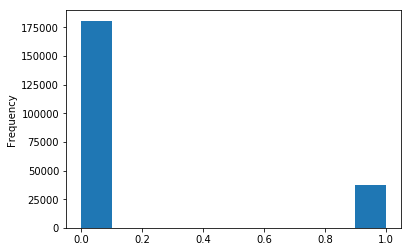

In [368]:
train['Target'].plot(kind='hist')
plt.show()

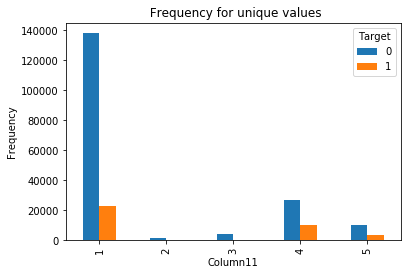

In [370]:
%matplotlib inline
pd.crosstab(train.Column11,train.Target).plot(kind='bar')
plt.title(' Frequency for unique values')
plt.xlabel('Column11')
plt.ylabel('Frequency')
plt.savefig('purchase')

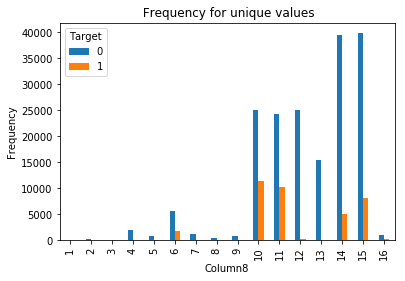

In [371]:
%matplotlib inline
pd.crosstab(train.Column8,train.Target).plot(kind='bar')
plt.title(' Frequency for unique values')
plt.xlabel('Column8')
plt.ylabel('Frequency')
plt.savefig('purchase1')

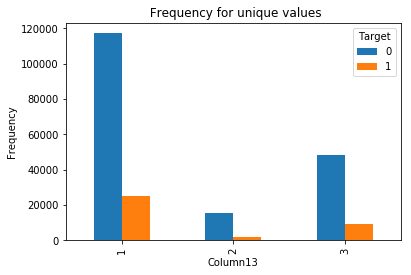

In [372]:
%matplotlib inline
pd.crosstab(train.Column13,train.Target).plot(kind='bar')
plt.title(' Frequency for unique values')
plt.xlabel('Column13')
plt.ylabel('Frequency')
plt.savefig('purchase2')

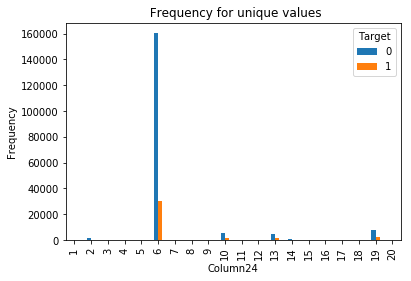

In [373]:
%matplotlib inline
pd.crosstab(train.Column24,train.Target).plot(kind='bar')
plt.title(' Frequency for unique values')
plt.xlabel('Column24')
plt.ylabel('Frequency')
plt.savefig('purchase3')

# Building the model

In [256]:
X_data=train.drop('Target',axis=1)
y=train['Target'].values

In [257]:
#splitting the dataset
SEED=7
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.80,stratify=y,random_state=SEED)

In [243]:
print(train['Column6'].head())

0   2016-05-01
1   2016-04-01
2   2016-02-01
3   2016-09-01
4   2015-11-01
Name: Column6, dtype: datetime64[ns]


In [244]:
train['Month'] = train["Column6"].dt.month
train["year"] = train["Column6"].dt.year

In [246]:
test['Column6']=pd.to_datetime(test['Column6'])
test['Month'] = test["Column6"].dt.month
test["year"] = test["Column6"].dt.year

In [254]:
del train['Column6']
del test['Column6']

In [258]:
#train the Xgboost model
model1=xgb.XGBClassifier(n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.5,objective='binary:logistic')
train_model1=model1.fit(X_train,y_train)


In [263]:
#prediction and classification report
from sklearn.metrics import classification_report
pred1=train_model1.predict(X_test)
print(pred1)

[0 1 0 ... 1 1 0]


E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [265]:
print('Model1 XGBOOST report %r' % (classification_report(y_test,pred1)))

Model1 XGBOOST report '             precision    recall  f1-score   support\n\n          0       0.91      0.97      0.94    144648\n          1       0.76      0.55      0.64     29548\n\navg / total       0.89      0.89      0.89    174196\n'


In [266]:
print("accuracy",(accuracy_score(y_test,pred1)*100))

accuracy 89.4061861351581


In [267]:
#Lets change the hyperparameter

model2=xgb.XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=5,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,SEED=7)

In [269]:
train_model2=model2.fit(X_train,y_train)
pred2=train_model2.predict(X_test)
print(pred2)

[0 1 0 ... 1 1 0]


E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [270]:
print('accuracy',(accuracy_score(y_test,pred2)*100))

accuracy 90.49404119497578


In [273]:
from sklearn.model_selection import GridSearchCV
param_test={'learning_rate':[0.01,0.1],'n_estimators':[200],'subsample':[0.3,0.5,0.8]}
gbm=xgb.XGBClassifier(max_depth=5,objective='binary:logistic',SEED=27)


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000017A1AF9B208>>
Traceback (most recent call last):
  File "E:\ANACONDA\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [275]:
gsearch=GridSearchCV(estimator=gbm,param_grid=param_test,scoring='accuracy',cv=4,verbose=1)
train_model3=gsearch.fit(X_train,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

In [277]:
pred3=train_model3.predict(X_test)
print('accuracy',(accuracy_score(y_test,pred3)*100))

accuracy 89.66508989873476


E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [279]:
#predict on test dataset
P_test=train_model2.predict(test)
print(P_test)

[1 0 0 ... 1 0 0]


E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [288]:
sub=pd.DataFrame()
sub['A']=P_test
sub.to_csv('machinelearning_jatin_jethwa.csv',index=False)

# For test dataset2

In [317]:
test2=pd.read_csv('E:\\aegis\\bookspdf\\testdataset2.csv')

In [291]:
test2.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28
0,1,C818,ARO-4928,PJAT015026,LJTR16460,12-2015,9.202520e+09,VAR SULP DI TT3,Col-4259,SC-40875,...,NaN,N,NaN,1.0,40.0,MFTRV9754,MFTRC322,USG2,LOTYPE500,APFPTV154265
1,2,C818,ARO-2179,PAAUT12615,LAAM15117,03-2016,9.226002e+09,VAR SULP TT4,Col-6930,SC-80722,...,NaN,N,NaN,1000.0,650.0,MFTRV9754,MFTRC322,USG4,LOTYPE1000,APHRNG24824
2,3,C818,ARO-2179,PAGR014598,LAGR15285,01-2017,9.231312e+09,VAR SULP DI TT3 PS,Col-4259,SC-80722,...,NaN,N,NaN,1200.0,100.0,MFTRV9754,MFTRC322,USG4,LOTYPE1000,APHRNG24824
3,4,D452,ARO-1926,PSKS028131,LSKS12968,04-2017,9.636454e+09,VAR SULP TT4 PS,Col-6930,SC-40875,...,NaN,N,NaN,1150.0,85.0,MFTRV9754,MFTRC322,USG4,LOTYPE500,APFPTV111550
4,5,B191,ARO-4742,PAUTW14708,LATW19806,06-2016,9.322202e+09,VAR SULP TT3 PS,Col-6930,SC-168364,...,NaN,N,NaN,1150.0,500.0,MFTRV9754,MFTRC322,USG4,LOTYPE1000,APHRNG24824


In [293]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87098 entries, 0 to 87097
Data columns (total 28 columns):
Column1     87098 non-null int64
Column2     87098 non-null object
Column3     87098 non-null object
Column4     87098 non-null object
Column5     87098 non-null object
Column6     87098 non-null object
Column7     82038 non-null float64
Column8     87098 non-null object
Column9     87098 non-null object
Column10    87098 non-null object
Column11    87098 non-null object
Column12    17167 non-null object
Column13    87098 non-null object
Column14    87098 non-null int64
Column15    10719 non-null float64
Column16    61572 non-null object
Column17    66835 non-null object
Column18    0 non-null float64
Column19    10370 non-null object
Column20    87098 non-null object
Column21    7373 non-null object
Column22    72137 non-null float64
Column23    71020 non-null float64
Column24    87098 non-null object
Column25    87098 non-null object
Column26    87098 non-null object
Column27 

In [318]:
test2.shape

(87098, 28)

In [319]:
#converting date to datetime object
test2['Column6']=pd.to_datetime(test2['Column6'])
print(test2['Column6'].dtypes)

datetime64[ns]


In [320]:
#column should be variables and rows should be observations
test2['Column3']=test2['Column3'].apply(lambda x:x.replace('ARO-',''))
test2['Column3']=pd.to_numeric(test2['Column3'],errors='coerce')


In [321]:
#column should be variables and rows should be observations(converting bad data to good data)
test2['Column9']=test2['Column9'].apply(lambda x:x.replace('Col-',''))
test2['Column9']=pd.to_numeric(test2['Column9'],errors='coerce')

In [322]:
#column should be variables and rows should be observations(converting bad data to good data)
test2['Column10']=test2['Column10'].apply(lambda x:x.replace('SC-',''))
test2['Column10']=pd.to_numeric(test2['Column10'],errors='coerce')

In [323]:
test2['Column12'].isnull().sum()

69931

In [324]:
#deleting column
del test2['Column12']

In [325]:
#finding frequency counts
test2['Column16'].value_counts(dropna=False)

N      52893
NaN    25526
Y       4769
S       2977
C        917
P          9
G          7
Name: Column16, dtype: int64

In [326]:
#As Nan values are more frequent will drop the column
del test2['Column16']

In [327]:
test2['Column17'].value_counts(dropna=False)

N      63312
NaN    20263
Y       3523
Name: Column17, dtype: int64

In [328]:
del test2['Column17']

In [329]:
test2['Column18'].value_counts(dropna=False)

NaN    87098
Name: Column18, dtype: int64

In [330]:
del test2['Column18']

In [331]:
test2['Column19'].value_counts(dropna=False)

NaN    76728
M       8531
S       1839
Name: Column19, dtype: int64

In [332]:
del test2['Column19']

In [333]:
test2['Column21'].value_counts(dropna=False)

NaN    79725
A3      3385
A2      2279
A4       745
A1       681
A5       283
Name: Column21, dtype: int64

In [334]:
del test2['Column21']

In [335]:
#imputing mean
test2['Column22'].value_counts(dropna=False)

 1150.0    20808
NaN        14961
 1500.0     7725
 1000.0     7538
 2000.0     6531
 2500.0     5669
 1200.0     4533
 1250.0     3649
 3000.0     2619
 1100.0     2433
 1800.0     1308
 900.0       484
 800.0       455
 1300.0      419
 850.0       378
 1400.0      362
 1600.0      337
 500.0       306
 700.0       287
 1.0         280
 1050.0      280
 2200.0      255
 1700.0      227
 750.0       193
 860.0       163
 2800.0      153
 1350.0      150
 1140.0      141
 600.0       133
 100.0       132
           ...  
 118.0         1
 248.0         1
 2465.0        1
 1335.0        1
 268.0         1
 233.0         1
 544.0         1
 530.0         1
 1109.0        1
 2356.0        1
 558.0         1
 1115.0        1
 685.0         1
 2225.0        1
 1427.0        1
 2088.0        1
 31.0          1
 1210.0        1
 1558.0        1
 2950.0        1
 1001.0        1
 1470.0        1
 1552.0        1
 320.0         1
 370.0         1
 865.0         1
 111.0         1
 89.0         

In [336]:
mean_value=test2['Column22'].mean()
test2['Column22']=test2['Column22'].fillna(mean_value)

In [337]:
median_value=test2['Column23'].median()
test2['Column23']=test2['Column23'].fillna(median_value)

In [338]:
#encoding column 11
labels = test2['Column11'].astype('category').cat.categories.tolist()
replace_map_comp = {'Column11' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Column11': {'Type-206': 1, 'Type-240': 2, 'Type-291': 3, 'Type-326': 4, 'Type-367': 5}}


In [339]:
test2.replace(replace_map_comp, inplace=True)
print(test2['Column11'].head())

0    4
1    4
2    1
3    1
4    1
Name: Column11, dtype: int64


In [340]:
#encoding column 8
labels1 = test2['Column8'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'Column8' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}

print(replace_map_comp1)


{'Column8': {'MMT 2WD': 1, 'MMT DX 2WD': 2, 'MMT GCN': 3, 'VAR FE TT3': 4, 'VAR FE TT3 REF': 5, 'VAR GCN TT4': 6, 'VAR STD TT3': 7, 'VAR STD TT3 REF': 8, 'VAR STD TT3 REF PS': 9, 'VAR SULP DI TT3': 10, 'VAR SULP DI TT3 PS': 11, 'VAR SULP TT3': 12, 'VAR SULP TT3 PS': 13, 'VAR SULP TT4': 14, 'VAR SULP TT4 PS': 15, 'VAR SULP TT4 PS CBC': 16}}


In [341]:
test2.replace(replace_map_comp1, inplace=True)
print(test2['Column8'].head())

0    10
1    14
2    11
3    15
4    13
Name: Column8, dtype: int64


In [342]:
labels3 = test2['Column24'].astype('category').cat.categories.tolist()
replace_map_comp3 = {'Column24' : {k: v for k,v in zip(labels3,list(range(1,len(labels3)+1)))}}

print(replace_map_comp3)

{'Column24': {'MAAV8527': 1, 'MALV6680': 2, 'MBJV14831': 3, 'MFMV14090': 4, 'MFTRV9754': 5, 'MKMV5934': 6, 'MMMV5201': 7, 'MNNV12321': 8, 'MOTV11811': 9, 'MPGV13018': 10, 'MRNV9809': 11, 'MSCIV8628': 12, 'MSILV4745': 13, 'MSIV9444': 14, 'MTTV8432': 15, 'MTVV11032': 16}}


In [343]:
test2.replace(replace_map_comp3, inplace=True)
print(test2['Column24'].head())

0    5
1    5
2    5
3    5
4    5
Name: Column24, dtype: int64


In [344]:
labels4 = test2['Column25'].astype('category').cat.categories.tolist()
replace_map_comp4 = {'Column25' : {k: v for k,v in zip(labels4,list(range(1,len(labels4)+1)))}}

print(replace_map_comp4)

{'Column25': {'M207C366': 1, 'M3WC484': 2, 'M3WLC288': 3, 'M3WVLC490': 4, 'M407C478': 5, 'MAC1C442': 6, 'MAHEC465': 7, 'MALC416': 8, 'MAMTC330': 9, 'MAPC370': 10, 'MAPEC287': 11, 'MATPC187': 12, 'MBLC451': 13, 'MBMC478': 14, 'MCDCC489': 15, 'MCLC206': 16, 'MCMC184': 17, 'MCPC434': 18, 'MDTC240': 19, 'MFTRC322': 20, 'MGCC486': 21, 'MGDCC141': 22, 'MGIOC405': 23, 'MGIOPC419': 24, 'MGSCC179': 25, 'MJEC268': 26, 'MKGC494': 27, 'MKKC229': 28, 'MKM2C342': 29, 'MKM3C298': 30, 'MLOC123': 31, 'MMDC159': 32, 'MMGC353': 33, 'MMIC217': 34, 'MMLC137': 35, 'MMMVC205': 36, 'MMXLC411': 37, 'MMXTC301': 38, 'MNNC253': 39, 'MOTHC256': 40, 'MPUPC287': 41, 'MRE60C435': 42, 'MREC307': 43, 'MSAC149': 44, 'MSCRC165': 45, 'MSGC374': 46, 'MSHC198': 47, 'MT15C184': 48, 'MT40C420': 49, 'MTCC192': 50, 'MTFC136': 51, 'MTGC410': 52, 'MTMC199': 53, 'MTTC212': 54, 'MTXC348': 55, 'MVKC205': 56, 'MVKRC387': 57, 'MZPC395': 58}}


In [345]:
test2.replace(replace_map_comp4, inplace=True)
print(test2['Column25'].head())

0    20
1    20
2    20
3    20
4    20
Name: Column25, dtype: int64


In [346]:
labels5 = test2['Column26'].astype('category').cat.categories.tolist()
replace_map_comp5 = {'Column26' : {k: v for k,v in zip(labels5,list(range(1,len(labels5)+1)))}}

print(replace_map_comp5)

{'Column26': {'USG1': 1, 'USG2': 2, 'USG3': 3, 'USG4': 4}}


In [347]:
test2.replace(replace_map_comp5, inplace=True)
print(test2['Column26'].head())

0    2
1    4
2    4
3    4
4    4
Name: Column26, dtype: int64


In [348]:
labels6 = test2['Column27'].astype('category').cat.categories.tolist()
replace_map_comp6 = {'Column27' : {k: v for k,v in zip(labels6,list(range(1,len(labels6)+1)))}}

print(replace_map_comp6)

{'Column27': {'LOTYPE100': 1, 'LOTYPE1000': 2, 'LOTYPE500': 3}}


In [349]:
test2.replace(replace_map_comp6, inplace=True)
print(test2['Column27'].head())

0    3
1    2
2    2
3    3
4    2
Name: Column27, dtype: int64


In [350]:
labels7 = test2['Column28'].astype('category').cat.categories.tolist()
replace_map_comp7 = {'Column28' : {k: v for k,v in zip(labels7,list(range(1,len(labels7)+1)))}}

print(replace_map_comp7)

{'Column28': {'APFIL14991': 1, 'APFIL24807': 2, 'APFIL31755': 3, 'APFPTV104077': 4, 'APFPTV111550': 5, 'APFPTV123179': 6, 'APFPTV133257': 7, 'APFPTV141468': 8, 'APFPTV14547': 9, 'APFPTV154265': 10, 'APFPTV2784': 11, 'APFPTV31635': 12, 'APFPTV43652': 13, 'APFPTV54157': 14, 'APFPTV62618': 15, 'APFPTV73341': 16, 'APFPTV8323': 17, 'APFPTV9946': 18, 'APHRNG1692': 19, 'APHRNG24824': 20}}


In [351]:
test2.replace(replace_map_comp7, inplace=True)
print(test2['Column28'].head())

0    10
1    20
2    20
3     5
4    20
Name: Column28, dtype: int64


In [352]:
labels8 = test2['Column2'].astype('category').cat.categories.tolist()
replace_map_comp8 = {'Column2' : {k: v for k,v in zip(labels8,list(range(1,len(labels8)+1)))}}

print(replace_map_comp8)

{'Column2': {'A121': 1, 'B191': 2, 'C818': 3, 'D452': 4, 'E919': 5}}


In [353]:
test2.replace(replace_map_comp8, inplace=True)
print(test2['Column2'].head())

0    3
1    3
2    3
3    4
4    2
Name: Column2, dtype: int64


In [354]:
del test2['Column4']
del test2['Column5']

In [355]:
labels10 = test2['Column13'].astype('category').cat.categories.tolist()
replace_map_comp10 = {'Column13' : {k: v for k,v in zip(labels10,list(range(1,len(labels10)+1)))}}

print(replace_map_comp10)

{'Column13': {'COM1': 1, 'COM2': 2, 'COM3': 3}}


In [356]:
test2.replace(replace_map_comp10, inplace=True)
print(test2['Column13'].head())

0    3
1    1
2    1
3    1
4    3
Name: Column13, dtype: int64


In [357]:
del test2['Column20']
del test2['Column15']

In [359]:
test2.shape

(87098, 18)

In [360]:
train.shape

(217744, 20)

In [361]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217744 entries, 0 to 217743
Data columns (total 20 columns):
Column1     217744 non-null int64
Column2     217744 non-null int64
Column3     217744 non-null int64
Column7     204967 non-null float64
Column8     217744 non-null int64
Column9     217744 non-null int64
Column10    217744 non-null int64
Column11    217744 non-null int64
Column13    217744 non-null int64
Column14    217744 non-null int64
Column22    217744 non-null float64
Column23    217744 non-null float64
Column24    217744 non-null int64
Column25    217744 non-null int64
Column26    217744 non-null int64
Column27    217744 non-null int64
Column28    217744 non-null int64
Target      217744 non-null int64
Month       217744 non-null int64
year        217744 non-null int64
dtypes: float64(3), int64(17)
memory usage: 33.2 MB


In [362]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87098 entries, 0 to 87097
Data columns (total 18 columns):
Column1     87098 non-null int64
Column2     87098 non-null int64
Column3     87098 non-null int64
Column6     87098 non-null datetime64[ns]
Column7     82038 non-null float64
Column8     87098 non-null int64
Column9     87098 non-null int64
Column10    87098 non-null int64
Column11    87098 non-null int64
Column13    87098 non-null int64
Column14    87098 non-null int64
Column22    87098 non-null float64
Column23    87098 non-null float64
Column24    87098 non-null int64
Column25    87098 non-null int64
Column26    87098 non-null int64
Column27    87098 non-null int64
Column28    87098 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(14)
memory usage: 12.0 MB


In [363]:
test2['Month'] = test2["Column6"].dt.month
test2["year"] = test2["Column6"].dt.year

In [364]:
del test2['Column6']

In [365]:
test2.shape

(87098, 19)

In [366]:
train.shape

(217744, 20)

In [374]:
#predict on test dataset
k_test=train_model2.predict(test2)
print(k_test)


[0 0 1 ... 0 0 0]


E:\ANACONDA\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [376]:
subk=pd.DataFrame()
subk['A']=k_test
subk.to_csv('machinelearn_jatin_jethwa.csv',index=False)

In [ ]:
#Model 2 results in greater accuracy
#So used here model2 with hyparameter